In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow.keras as K
from tensorflow.keras.layers import Dense, Normalization
import seaborn as sns

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data' 
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
                'acceleration', 'model_year', 'origin']

data = pd.read_csv(url, names=column_names,
                    na_values='?', comment='\t',
                    sep=' ', skipinitialspace=True)


In [3]:
data = data.drop('origin', 1)
print(data.isna().sum())
data = data.dropna()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
dtype: int64


/var/folders/p5/32mb12x959s4wk6tf8vcdx680000gn/T/ipykernel_3556/2624220024.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop('origin', 1)


In [4]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504.0,12.0,70
1,15.0,8,350.0,165.0,3693.0,11.5,70
2,18.0,8,318.0,150.0,3436.0,11.0,70
3,16.0,8,304.0,150.0,3433.0,12.0,70
4,17.0,8,302.0,140.0,3449.0,10.5,70


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 24.5 KB


In [6]:
train_dataset = data.sample(frac=0.8, random_state=0)
test_dataset = data.drop(train_dataset.index)

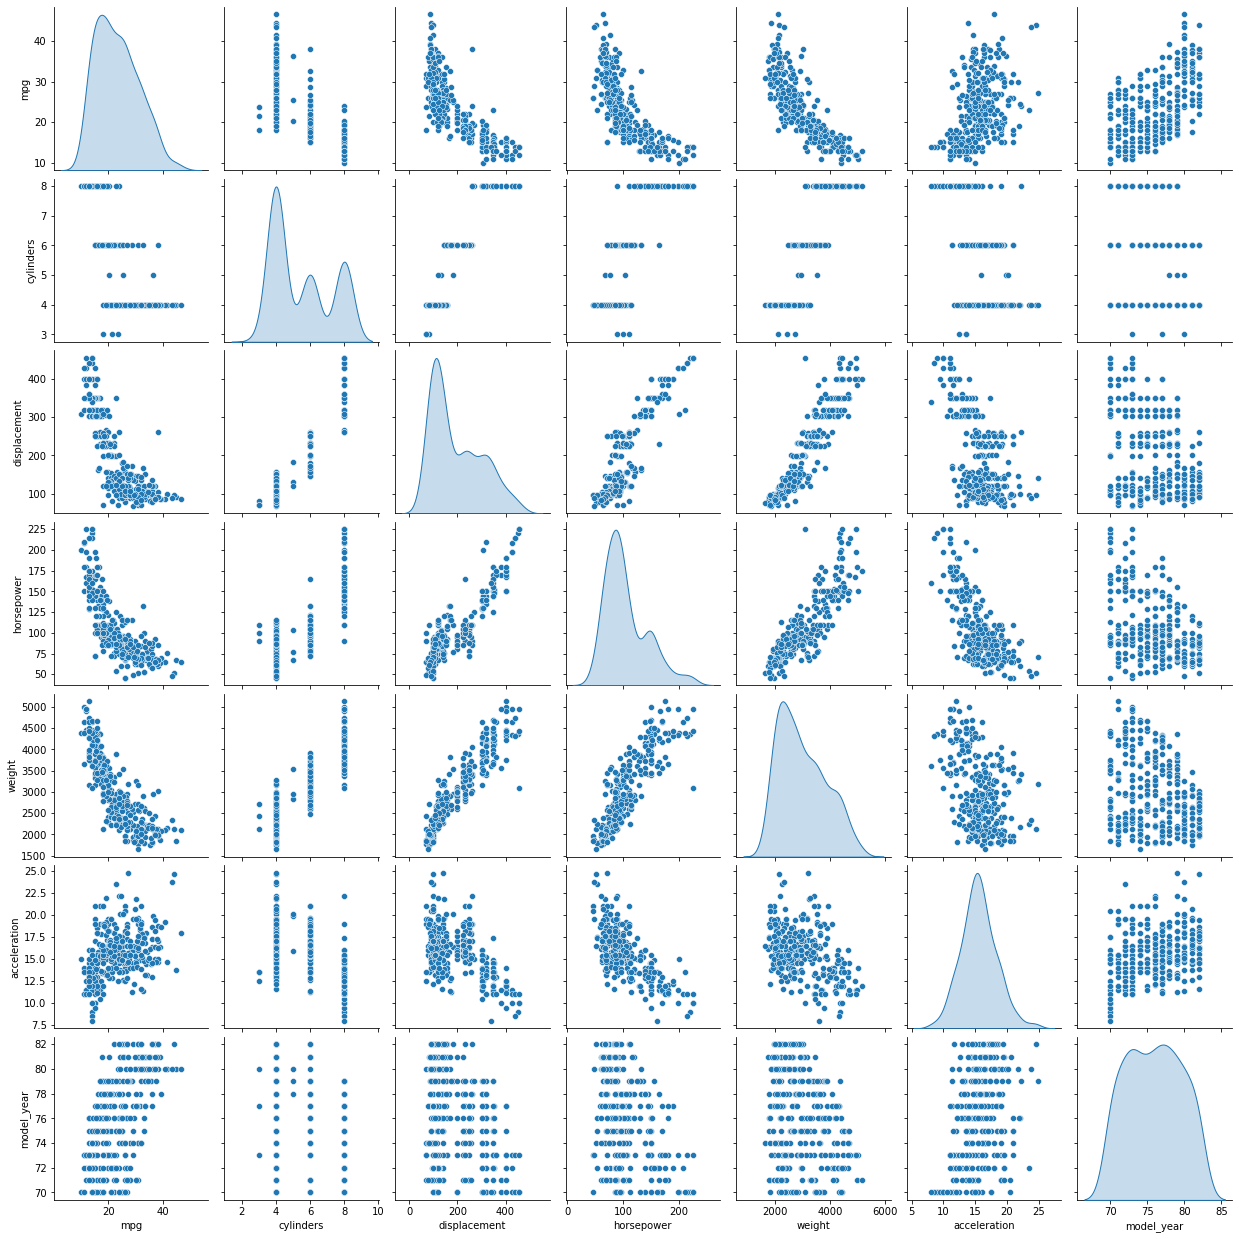

In [7]:
sns.pairplot(train_dataset[['mpg', 'cylinders', 'displacement','horsepower', 'weight', 'acceleration', 'model_year']], diag_kind='kde')

In [8]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
mpg,23.310510,7.728652
cylinders,5.477707,1.699788
displacement,195.318471,104.331589
horsepower,104.869427,38.096214
weight,2990.251592,843.898596
acceleration,15.559236,2.789230
model_year,75.898089,3.675642


In [9]:
train_features = train_dataset.copy()
test_features = test_dataset.copy() 

train_labels = train_features.pop('mpg')
test_labels = test_features.pop('mpg')


In [10]:
#Normalize
data_normalizer = Normalization(axis=1)
data_normalizer.adapt(np.array(train_features))


2022-09-17 11:57:43.112156: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-17 11:57:43.112437: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-09-17 11:57:43.179437: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-09-17 11:57:43.231829: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-17 11:57:43.246499: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Metal device set to: Apple M1 Pro


In [11]:
model = K.Sequential([
                      data_normalizer,
                      Dense(64,  activation='relu'),
                      Dense(32,  activation='relu'),
                      Dense(1,  activation=None)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 6)                13        
 n)                                                              
                                                                 
 dense (Dense)               (None, 64)                448       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,574
Trainable params: 2,561
Non-trainable params: 13
_________________________________________________________________


In [12]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
history = model.fit(x=train_features,y=train_labels, epochs=100, verbose=1, validation_split=0.2)

Epoch 1/100


2022-09-17 11:57:59.877670: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 1s 41ms/step - loss: 598.1361 - val_loss: 615.6049
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 583.2889 - val_loss: 599.4585
Epoch 3/100
8/8 [==============================] - 0s 7ms/step - loss: 568.3937 - val_loss: 582.6407
Epoch 4/100
8/8 [==============================] - 0s 7ms/step - loss: 552.4486 - val_loss: 563.2554
Epoch 5/100
1/8 [==>...........................] - ETA: 0s - loss: 623.8878

2022-09-17 11:58:01.195006: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 0s 6ms/step - loss: 533.0944 - val_loss: 539.8501
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 509.7139 - val_loss: 511.9417
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 481.8752 - val_loss: 478.8471
Epoch 8/100
8/8 [==============================] - 0s 6ms/step - loss: 448.1751 - val_loss: 440.1752
Epoch 9/100
8/8 [==============================] - 0s 6ms/step - loss: 409.8208 - val_loss: 395.2845
Epoch 10/100
8/8 [==============================] - 0s 6ms/step - loss: 365.6189 - val_loss: 345.3843
Epoch 11/100
8/8 [==============================] - 0s 6ms/step - loss: 317.3243 - val_loss: 291.8386
Epoch 12/100
8/8 [==============================] - 0s 6ms/step - loss: 265.3189 - val_loss: 236.4691
Epoch 13/100
8/8 [==============================] - 0s 7ms/step - loss: 211.7404 - val_loss: 182.1974
Epoch 14/100
8/8 [==============================] - 0s 6ms/step - loss: 161.5797 - val_loss: 131.74

8/8 [==============================] - 0s 7ms/step - loss: 7.7933 - val_loss: 10.3904
Epoch 88/100
8/8 [==============================] - 0s 6ms/step - loss: 7.7962 - val_loss: 10.2816
Epoch 89/100
8/8 [==============================] - 0s 6ms/step - loss: 7.7122 - val_loss: 10.2010
Epoch 90/100
8/8 [==============================] - 0s 6ms/step - loss: 7.6727 - val_loss: 10.1441
Epoch 91/100
8/8 [==============================] - 0s 6ms/step - loss: 7.6439 - val_loss: 10.0910
Epoch 92/100
8/8 [==============================] - 0s 6ms/step - loss: 7.6041 - val_loss: 10.1033
Epoch 93/100
8/8 [==============================] - 0s 6ms/step - loss: 7.5950 - val_loss: 10.0167
Epoch 94/100
8/8 [==============================] - 0s 6ms/step - loss: 7.5326 - val_loss: 10.0795
Epoch 95/100
8/8 [==============================] - 0s 6ms/step - loss: 7.5249 - val_loss: 10.0481
Epoch 96/100
8/8 [==============================] - 0s 6ms/step - loss: 7.4713 - val_loss: 9.9635
Epoch 97/100
8/8 [======

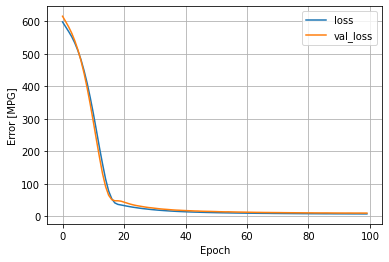

In [14]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)

2022-09-17 11:58:21.230483: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


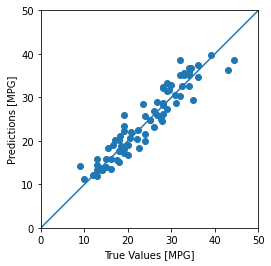

In [15]:
y_pred = model.predict(test_features).flatten()
a = plt.axes(aspect='equal')
plt.scatter(test_labels, y_pred)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims)


Text(0, 0.5, 'Count')

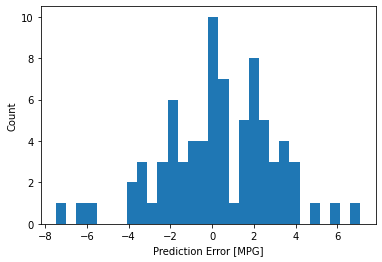

In [17]:
error = y_pred - test_labels
plt.hist(error, bins=30)
plt.xlabel('Prediction Error [MPG]')
plt.ylabel('Count')